# Import

In [ ]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# V0 - Failed

In [ ]:
train_v0 = pd.read_csv('./drive/MyDrive/Colab Notebooks/LPBA_3/train_v0.csv')

data_1 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA/Data.xlsx')
data_2 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA_2/Data.xlsx')
data_3 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA_3/Data.xlsx')



data_1.drop('크라운해태 LPBA 챔피언십 2024 한가위', axis=1, inplace=True)
data_1.reset_index(inplace=True)
data_1.rename(columns={'index': 'image_name'}, inplace=True)
data_1['image_name'] = data_1['image_name'] + 1

data_2.drop('2024 LPBA SYBAZZAR Hanoi Open', axis=1, inplace=True)
data_2.reset_index(inplace=True)
data_2.rename(columns={'index': 'image_name'}, inplace=True)
data_2['image_name'] = data_2['image_name'] + 2164

data_3.drop('휴온스 LPBA 챔피언십', axis=1, inplace=True)
data_3.reset_index(inplace=True)
data_3.rename(columns={'index': 'image_name'}, inplace=True)
data_3['image_name'] = data_3['image_name'] + 4585

data = pd.concat([data_1,data_2,data_3], join='outer', axis=0, ignore_index=True)



train_v0 = train_v0.sort_values(by='image_name', ascending=True).reset_index(drop=True)



data_train = data[data['image_name'].isin(train_v0['image_name'])]
data_train = pd.merge(data_train, train_v0, how='inner').reset_index(drop=True)

## Train

In [ ]:
data_train

,image_name,Score,Ball,Results,Player,Compet,Match,Set,pred_proba
0,1,초구,1,0,김가영,한지은,결승,7,0.129337
1,2,0,1,0,김가영,한지은,결승,7,0.045423
2,3,0,1,0,김가영,한지은,결승,7,0.014827
3,4,0,1,0,김가영,한지은,결승,7,0.000441
4,5,0,1,1,김가영,한지은,결승,7,0.970650
...,...,...,...,...,...,...,...,...,...
6263,6695,1,2,1,윤경남,김세연,32강,1,0.992741
6264,6696,1,2,0,윤경남,김세연,32강,1,0.017046
6265,6697,0,2,1,윤경남,김세연,32강,1,0.998908
6266,6698,1,2,0,윤경남,김세연,32강,1,0.013501


In [ ]:
data_train_results_0 = data_train[data_train['Results'] == 0]
data_train_results_1 = data_train[data_train['Results'] == 1]

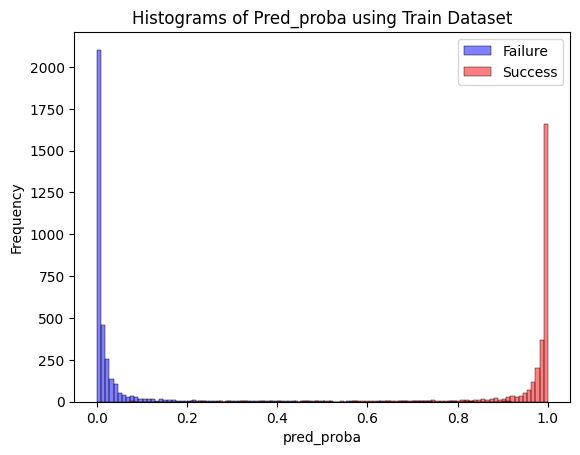


Failure Count: 3476
Success Count: 2792


In [ ]:
sns.histplot(data_train_results_0, x='pred_proba', bins=100, label='Failure', color='blue', alpha=0.5)
sns.histplot(data_train_results_1, x='pred_proba', bins=100, label='Success', color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Train Dataset')
plt.legend()
plt.show()

print()
print("Failure Count:", len(data_train_results_0))
print("Success Count:", len(data_train_results_1))

### Analysis

#### 포지션 플레이: 자신에게 얼마나 쉽게 공을 주는가?  
**Threshold보다 큰 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 196
Success Count: 232

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 232
비율: 0.54


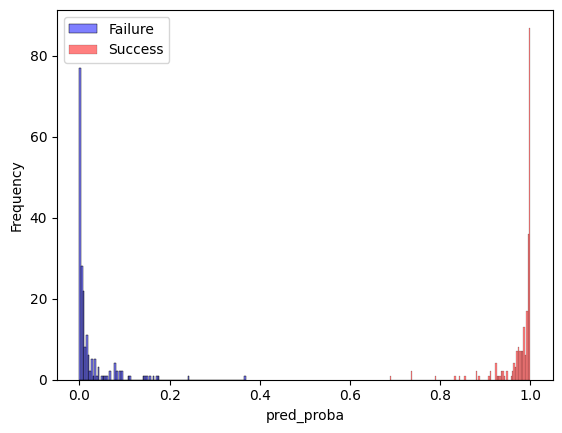

In [ ]:
김가영_포지션플레이_1 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['Score'] == 1)]

김가영_포지션플레이_1_0 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 0]
김가영_포지션플레이_1_1 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_1_0))
print("Success Count:", len(김가영_포지션플레이_1_1))
print()



print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_1), 2))



sns.histplot(김가영_포지션플레이_1_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_1_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 82
Success Count: 81

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 81
비율: 0.5


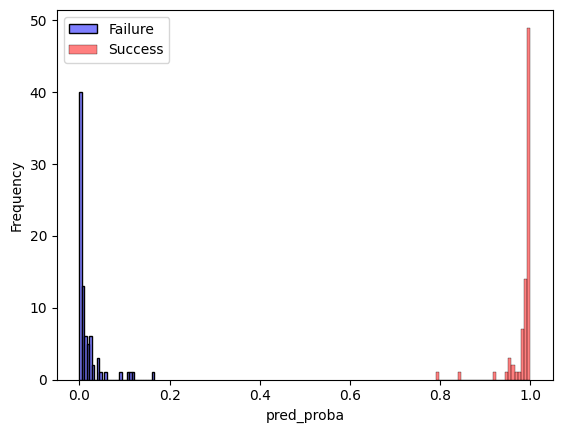

In [ ]:
스롱_포지션플레이_1 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['Score'] == 1)]

스롱_포지션플레이_1_0 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 0]
스롱_포지션플레이_1_1 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_1_0))
print("Success Count:", len(스롱_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_1), 2))



sns.histplot(스롱_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 52
Success Count: 39

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 39
비율: 0.43


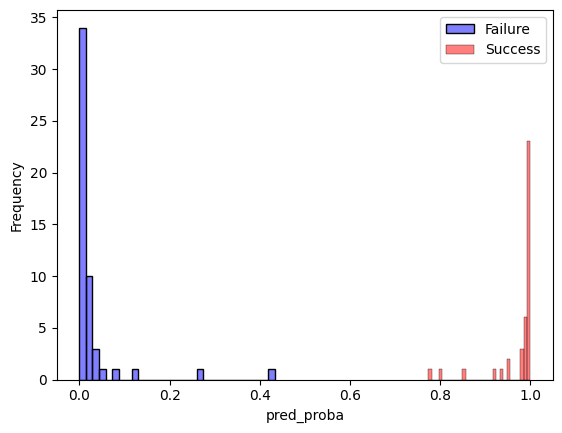

In [ ]:
백민주_포지션플레이_1 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['Score'] == 1)]

백민주_포지션플레이_1_0 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 0]
백민주_포지션플레이_1_1 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_1_0))
print("Success Count:", len(백민주_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_1), 2))



sns.histplot(백민주_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 포지션 플레이: 상대방에게 얼마나 어렵게 공을 주는가?
**Threshold보다 작은 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 265
Success Count: 162

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 265
비율: 0.62


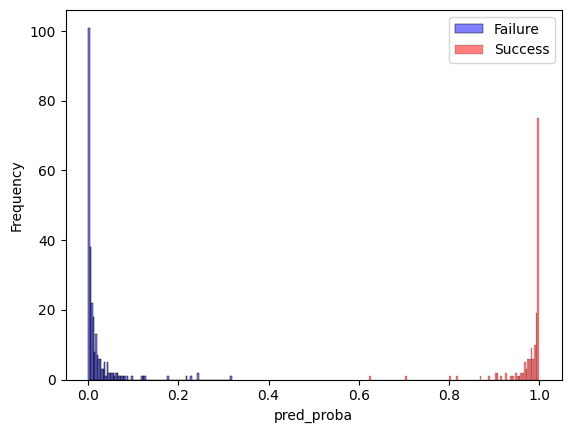

In [ ]:
김가영_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '김가영')&(data_train['Score'] == 0)]

김가영_포지션플레이_2_0 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 0]
김가영_포지션플레이_2_1 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_2_0))
print("Success Count:", len(김가영_포지션플레이_2_1))
print()



print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_2), 2))



sns.histplot(김가영_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 120
Success Count: 76

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 120
비율: 0.61


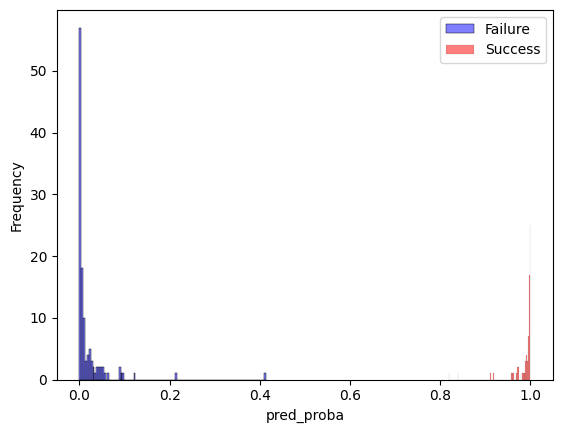

In [ ]:
스롱_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '스롱 피아비')&(data_train['Score'] == 0)]

스롱_포지션플레이_2_0 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 0]
스롱_포지션플레이_2_1 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_2_0))
print("Success Count:", len(스롱_포지션플레이_2_1))
print()


print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_2), 2))


sns.histplot(스롱_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 76
Success Count: 66

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 76
비율: 0.54


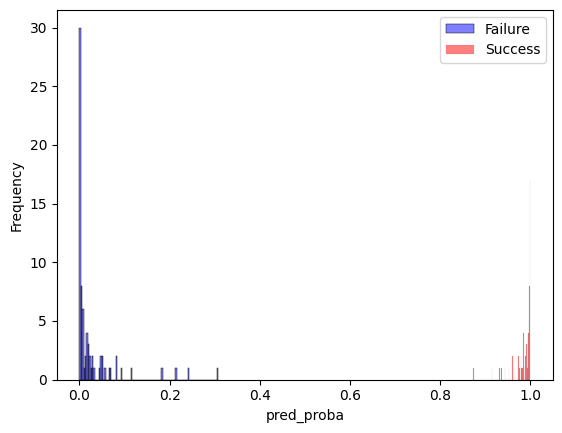

In [ ]:
백민주_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '백민주')&(data_train['Score'] == 0)]

백민주_포지션플레이_2_0 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 0]
백민주_포지션플레이_2_1 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_2_0))
print("Success Count:", len(백민주_포지션플레이_2_1))
print()

print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_2), 2))

sns.histplot(백민주_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 저난이도 공을 얼마나 잘 처리하는가?
**Threshold 이상의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 4
Success Count: 478

저난이도 공 중 성공한 배치의 비율: 0.99


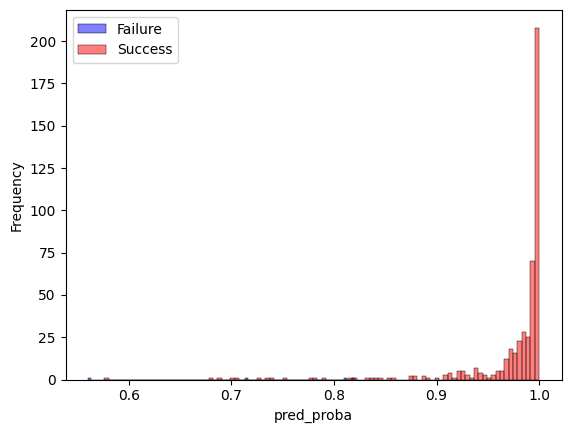

In [ ]:
김가영_해결력_1 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['pred_proba'] > 0.5)]

김가영_해결력_1_0 = 김가영_해결력_1[김가영_해결력_1['Results'] == 0]
김가영_해결력_1_1 = 김가영_해결력_1[김가영_해결력_1['Results'] == 1]

print("Failure Count:", len(김가영_해결력_1_0))
print("Success Count:", len(김가영_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_1_1) / len(김가영_해결력_1), 2))



sns.histplot(김가영_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 0
Success Count: 178

저난이도 공 중 성공한 배치의 비율: 1.0


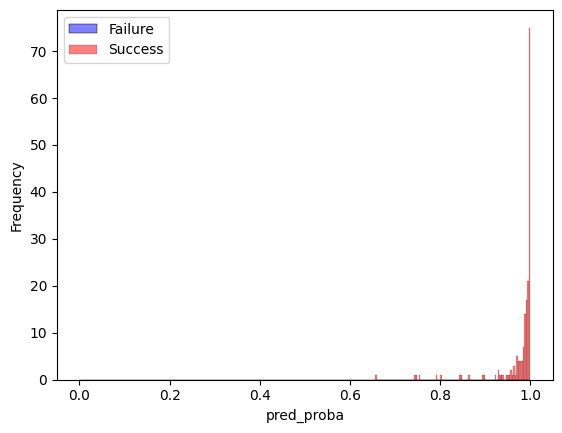

In [ ]:
스롱_해결력_1 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['pred_proba'] > 0.5)]

스롱_해결력_1_0 = 스롱_해결력_1[스롱_해결력_1['Results'] == 0]
스롱_해결력_1_1 = 스롱_해결력_1[스롱_해결력_1['Results'] == 1]

print("Failure Count:", len(스롱_해결력_1_0))
print("Success Count:", len(스롱_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_1_1) / len(스롱_해결력_1), 2))


sns.histplot(스롱_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 1
Success Count: 92

저난이도 공 중 성공한 배치의 비율: 0.99


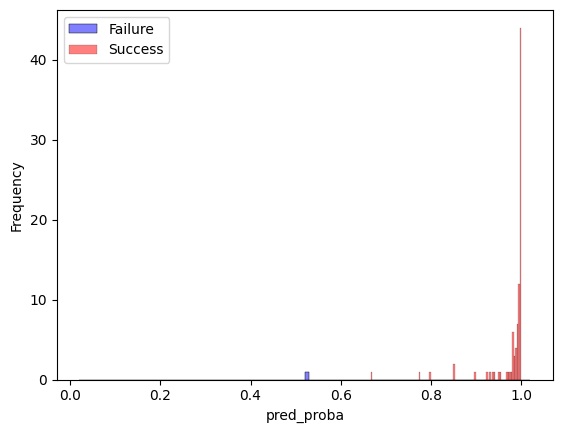

In [ ]:
백민주_해결력_1 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['pred_proba'] > 0.5)]

백민주_해결력_1_0 = 백민주_해결력_1[백민주_해결력_1['Results'] == 0]
백민주_해결력_1_1 = 백민주_해결력_1[백민주_해결력_1['Results'] == 1]

print("Failure Count:", len(백민주_해결력_1_0))
print("Success Count:", len(백민주_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_1_1) / len(백민주_해결력_1), 2))


sns.histplot(백민주_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 고난이도 공을 얼마나 잘 처리하는가?
**Threshold 이하의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 416
Success Count: 5

고난이도 공 중 성공한 배치의 비율: 0.01


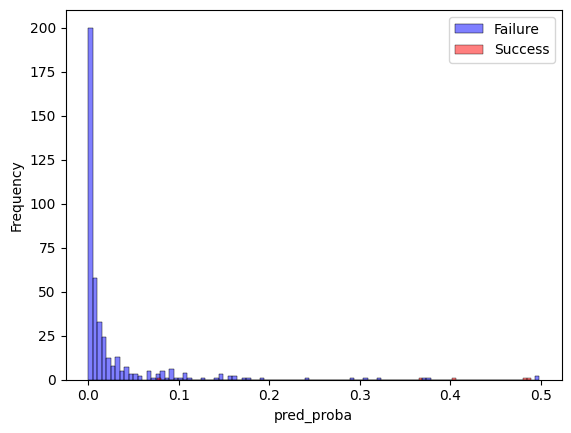

In [ ]:
김가영_해결력_2 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['pred_proba'] < 0.5)]

김가영_해결력_2_0 = 김가영_해결력_2[김가영_해결력_2['Results'] == 0]
김가영_해결력_2_1 = 김가영_해결력_2[김가영_해결력_2['Results'] == 1]

print("Failure Count:", len(김가영_해결력_2_0))
print("Success Count:", len(김가영_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_2_1) / len(김가영_해결력_2), 2))



sns.histplot(김가영_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 193
Success Count: 0

고난이도 공 중 성공한 배치의 비율: 0.0


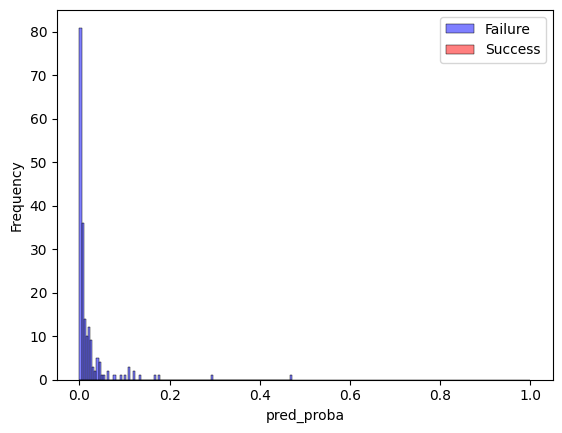

In [ ]:
스롱_해결력_2 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['pred_proba'] < 0.5)]

스롱_해결력_2_0 = 스롱_해결력_2[스롱_해결력_2['Results'] == 0]
스롱_해결력_2_1 = 스롱_해결력_2[스롱_해결력_2['Results'] == 1]

print("Failure Count:", len(스롱_해결력_2_0))
print("Success Count:", len(스롱_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_2_1) / len(스롱_해결력_2), 2))


sns.histplot(스롱_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 126
Success Count: 3

고난이도 공 중 성공한 배치의 비율: 0.02


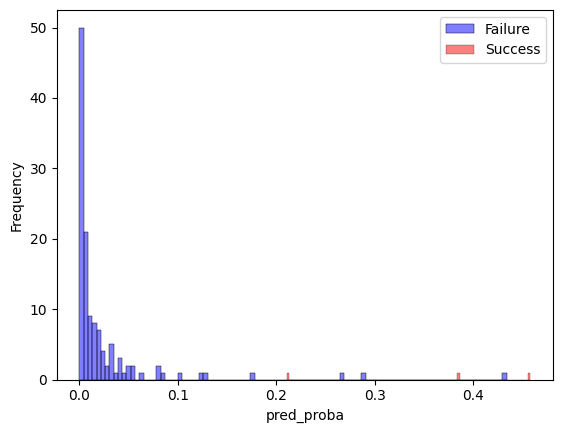

In [ ]:
백민주_해결력_2 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['pred_proba'] < 0.5)]

백민주_해결력_2_0 = 백민주_해결력_2[백민주_해결력_2['Results'] == 0]
백민주_해결력_2_1 = 백민주_해결력_2[백민주_해결력_2['Results'] == 1]

print("Failure Count:", len(백민주_해결력_2_0))
print("Success Count:", len(백민주_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_2_1) / len(백민주_해결력_2), 2))


sns.histplot(백민주_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# V1

In [ ]:
train_v1 = pd.read_csv('./drive/MyDrive/Colab Notebooks/LPBA_3/train_v1.csv')
val_v1 = pd.read_csv('./drive/MyDrive/Colab Notebooks/LPBA_3/val_v1.csv')

data_1 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA/Data.xlsx')
data_2 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA_2/Data.xlsx')
data_3 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA_3/Data.xlsx')



data_1.drop('크라운해태 LPBA 챔피언십 2024 한가위', axis=1, inplace=True)
data_1.reset_index(inplace=True)
data_1.rename(columns={'index': 'image_name'}, inplace=True)
data_1['image_name'] = data_1['image_name'] + 1

data_2.drop('2024 LPBA SYBAZZAR Hanoi Open', axis=1, inplace=True)
data_2.reset_index(inplace=True)
data_2.rename(columns={'index': 'image_name'}, inplace=True)
data_2['image_name'] = data_2['image_name'] + 2164

data_3.drop('휴온스 LPBA 챔피언십', axis=1, inplace=True)
data_3.reset_index(inplace=True)
data_3.rename(columns={'index': 'image_name'}, inplace=True)
data_3['image_name'] = data_3['image_name'] + 4585

data = pd.concat([data_1,data_2,data_3], join='outer', axis=0, ignore_index=True)



train_v1.drop('Unnamed: 0', axis=1, inplace=True)
train_v1 = train_v1.sort_values(by='image_name', ascending=True).reset_index(drop=True)

val_v1.drop('Unnamed: 0', axis=1, inplace=True)
val_v1 = val_v1.sort_values(by='image_name', ascending=True).reset_index(drop=True)



data_train = data[data['image_name'].isin(train_v1['image_name'])]
data_train = pd.merge(data_train, train_v1, how='inner').reset_index(drop=True)

data_val = data[data['image_name'].isin(val_v1['image_name'])]
data_val = pd.merge(data_val, val_v1, how='inner').reset_index(drop=True)

## Train

In [ ]:
data_train

,image_name,Score,Ball,Results,Player,Compet,Match,Set,pred_proba
0,1,초구,1,0,김가영,한지은,결승,7,0.451574
1,2,0,1,0,김가영,한지은,결승,7,0.364200
2,3,0,1,0,김가영,한지은,결승,7,0.076919
3,4,0,1,0,김가영,한지은,결승,7,0.291525
4,5,0,1,1,김가영,한지은,결승,7,0.756443
...,...,...,...,...,...,...,...,...,...
5009,6691,0,2,0,윤경남,김세연,32강,1,0.308685
5010,6694,1,2,1,윤경남,김세연,32강,1,0.250095
5011,6696,1,2,0,윤경남,김세연,32강,1,0.219276
5012,6697,0,2,1,윤경남,김세연,32강,1,0.335164


In [ ]:
data_train_results_0 = data_train[data_train['Results'] == 0]
data_train_results_1 = data_train[data_train['Results'] == 1]

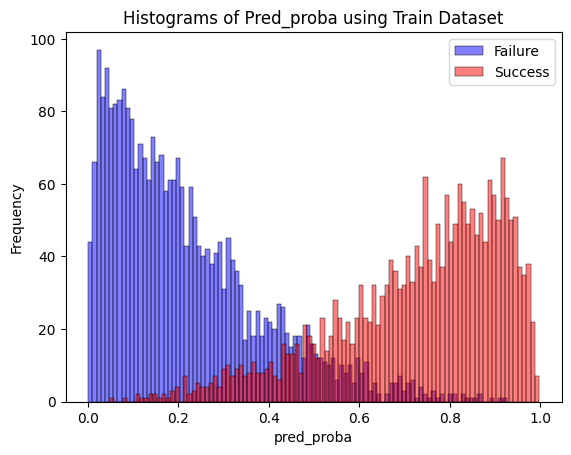


Failure Count: 2773
Success Count: 2241


In [ ]:
sns.histplot(data_train_results_0, x='pred_proba', bins=100, label='Failure', color='blue', alpha=0.5)
sns.histplot(data_train_results_1, x='pred_proba', bins=100, label='Success', color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Train Dataset')
plt.legend()
plt.show()

print()
print("Failure Count:", len(data_train_results_0))
print("Success Count:", len(data_train_results_1))

### Analysis

#### 포지션 플레이: 자신에게 얼마나 쉽게 공을 주는가?  
**Threshold보다 큰 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 143
Success Count: 183

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 183
비율: 0.56


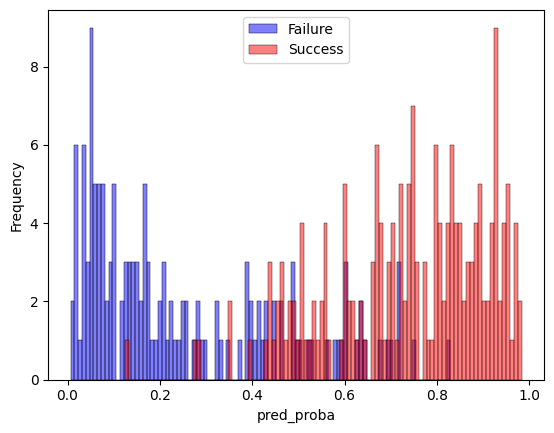

In [ ]:
김가영_포지션플레이_1 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['Score'] == 1)]

김가영_포지션플레이_1_0 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 0]
김가영_포지션플레이_1_1 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_1_0))
print("Success Count:", len(김가영_포지션플레이_1_1))
print()



print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_1), 2))



sns.histplot(김가영_포지션플레이_1_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_1_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 68
Success Count: 69

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 64
비율: 0.47


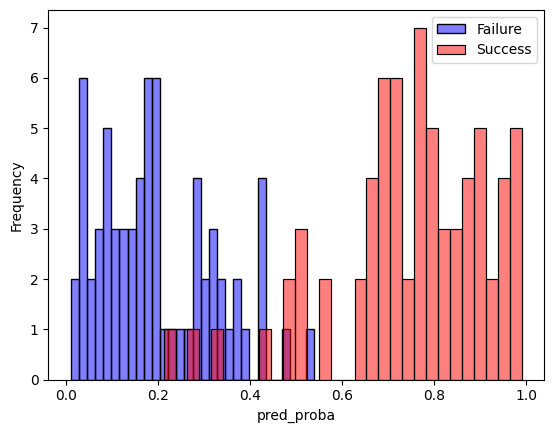

In [ ]:
스롱_포지션플레이_1 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['Score'] == 1)]

스롱_포지션플레이_1_0 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 0]
스롱_포지션플레이_1_1 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_1_0))
print("Success Count:", len(스롱_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_1), 2))



sns.histplot(스롱_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 42
Success Count: 33

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 31
비율: 0.41


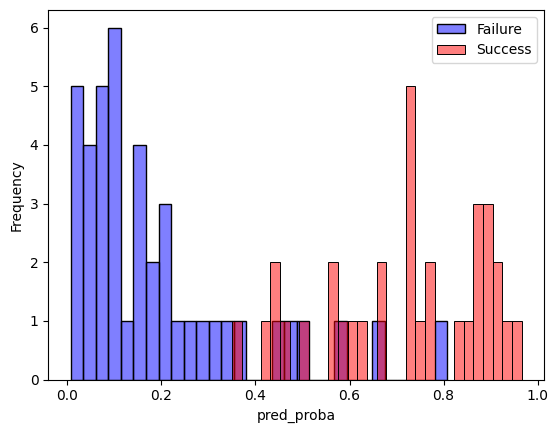

In [ ]:
백민주_포지션플레이_1 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['Score'] == 1)]

백민주_포지션플레이_1_0 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 0]
백민주_포지션플레이_1_1 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_1_0))
print("Success Count:", len(백민주_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_1), 2))



sns.histplot(백민주_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 포지션 플레이: 상대방에게 얼마나 어렵게 공을 주는가?
**Threshold보다 작은 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 205
Success Count: 134

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 211
비율: 0.62


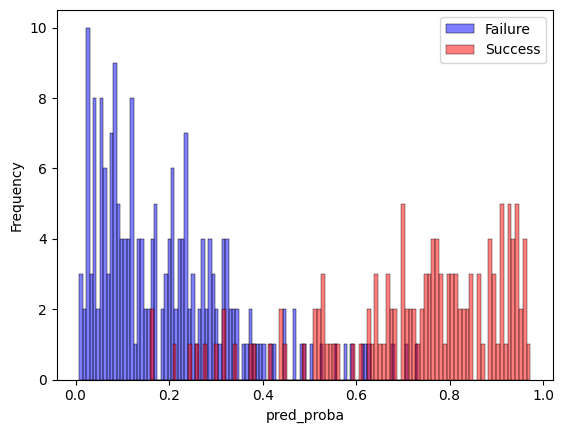

In [ ]:
김가영_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '김가영')&(data_train['Score'] == 0)]

김가영_포지션플레이_2_0 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 0]
김가영_포지션플레이_2_1 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_2_0))
print("Success Count:", len(김가영_포지션플레이_2_1))
print()



print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_2), 2))



sns.histplot(김가영_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 94
Success Count: 63

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 98
비율: 0.62


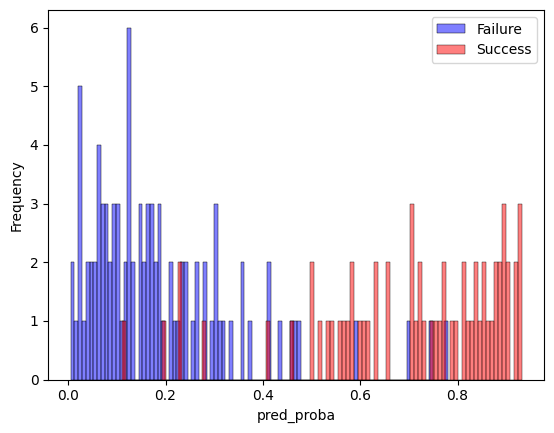

In [ ]:
스롱_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '스롱 피아비')&(data_train['Score'] == 0)]

스롱_포지션플레이_2_0 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 0]
스롱_포지션플레이_2_1 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_2_0))
print("Success Count:", len(스롱_포지션플레이_2_1))
print()


print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_2), 2))


sns.histplot(스롱_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 61
Success Count: 58

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 64
비율: 0.54


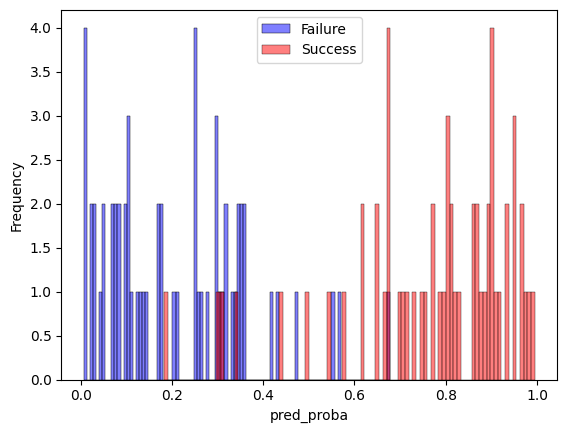

In [ ]:
백민주_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '백민주')&(data_train['Score'] == 0)]

백민주_포지션플레이_2_0 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 0]
백민주_포지션플레이_2_1 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_2_0))
print("Success Count:", len(백민주_포지션플레이_2_1))
print()

print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_2), 2))

sns.histplot(백민주_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 저난이도 공을 얼마나 잘 처리하는가?
**Threshold 이상의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 35
Success Count: 336

저난이도 공 중 성공한 배치의 비율: 0.91


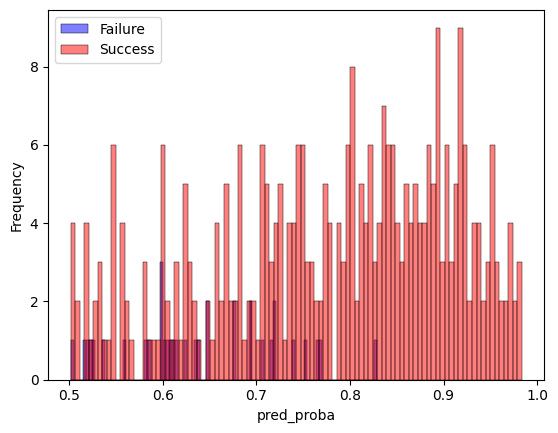

In [ ]:
김가영_해결력_1 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['pred_proba'] > 0.5)]

김가영_해결력_1_0 = 김가영_해결력_1[김가영_해결력_1['Results'] == 0]
김가영_해결력_1_1 = 김가영_해결력_1[김가영_해결력_1['Results'] == 1]

print("Failure Count:", len(김가영_해결력_1_0))
print("Success Count:", len(김가영_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_1_1) / len(김가영_해결력_1), 2))



sns.histplot(김가영_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 6
Success Count: 126

저난이도 공 중 성공한 배치의 비율: 0.95


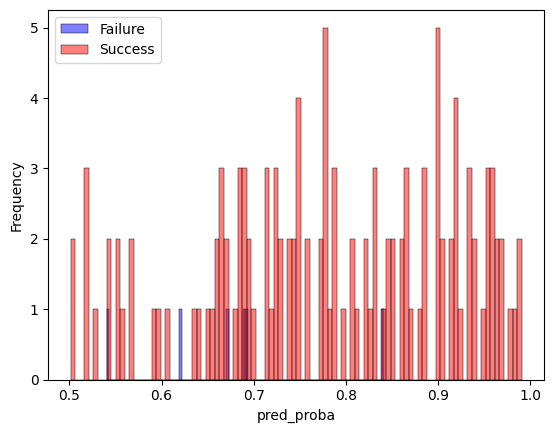

In [ ]:
스롱_해결력_1 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['pred_proba'] > 0.5)]

스롱_해결력_1_0 = 스롱_해결력_1[스롱_해결력_1['Results'] == 0]
스롱_해결력_1_1 = 스롱_해결력_1[스롱_해결력_1['Results'] == 1]

print("Failure Count:", len(스롱_해결력_1_0))
print("Success Count:", len(스롱_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_1_1) / len(스롱_해결력_1), 2))


sns.histplot(스롱_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 9
Success Count: 68

저난이도 공 중 성공한 배치의 비율: 0.88


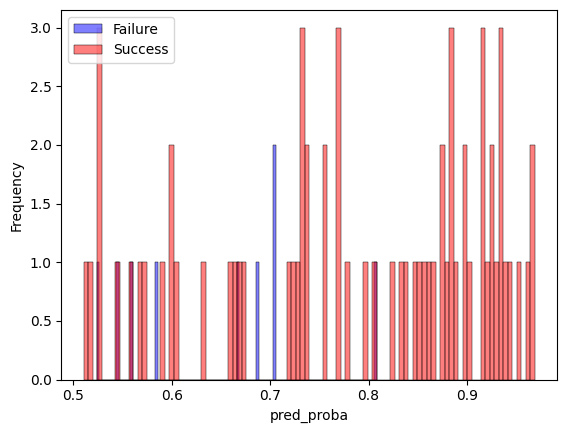

In [ ]:
백민주_해결력_1 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['pred_proba'] > 0.5)]

백민주_해결력_1_0 = 백민주_해결력_1[백민주_해결력_1['Results'] == 0]
백민주_해결력_1_1 = 백민주_해결력_1[백민주_해결력_1['Results'] == 1]

print("Failure Count:", len(백민주_해결력_1_0))
print("Success Count:", len(백민주_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_1_1) / len(백민주_해결력_1), 2))


sns.histplot(백민주_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 고난이도 공을 얼마나 잘 처리하는가?
**Threshold 이하의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 284
Success Count: 49

고난이도 공 중 성공한 배치의 비율: 0.15


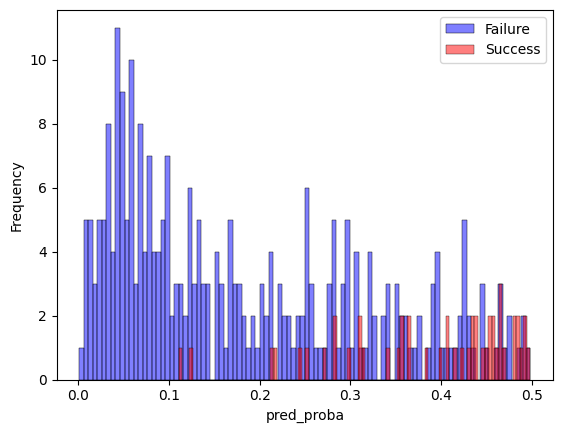

In [ ]:
김가영_해결력_2 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['pred_proba'] < 0.5)]

김가영_해결력_2_0 = 김가영_해결력_2[김가영_해결력_2['Results'] == 0]
김가영_해결력_2_1 = 김가영_해결력_2[김가영_해결력_2['Results'] == 1]

print("Failure Count:", len(김가영_해결력_2_0))
print("Success Count:", len(김가영_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_2_1) / len(김가영_해결력_2), 2))



sns.histplot(김가영_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 143
Success Count: 15

고난이도 공 중 성공한 배치의 비율: 0.09


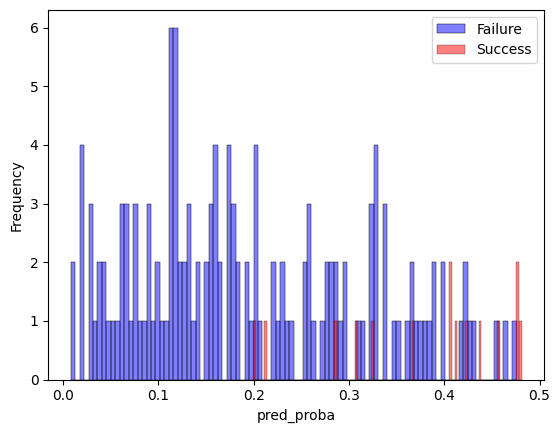

In [ ]:
스롱_해결력_2 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['pred_proba'] < 0.5)]

스롱_해결력_2_0 = 스롱_해결력_2[스롱_해결력_2['Results'] == 0]
스롱_해결력_2_1 = 스롱_해결력_2[스롱_해결력_2['Results'] == 1]

print("Failure Count:", len(스롱_해결력_2_0))
print("Success Count:", len(스롱_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_2_1) / len(스롱_해결력_2), 2))


sns.histplot(스롱_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 92
Success Count: 11

고난이도 공 중 성공한 배치의 비율: 0.11


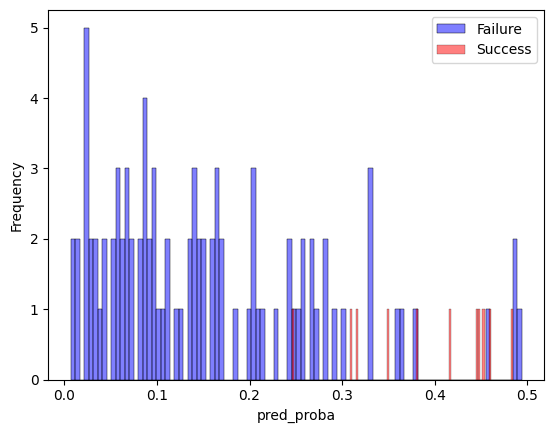

In [ ]:
백민주_해결력_2 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['pred_proba'] < 0.5)]

백민주_해결력_2_0 = 백민주_해결력_2[백민주_해결력_2['Results'] == 0]
백민주_해결력_2_1 = 백민주_해결력_2[백민주_해결력_2['Results'] == 1]

print("Failure Count:", len(백민주_해결력_2_0))
print("Success Count:", len(백민주_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_2_1) / len(백민주_해결력_2), 2))


sns.histplot(백민주_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Test

In [ ]:
data_val

,image_name,Score,Ball,Results,Player,Compet,Match,Set,pred_proba
0,9,1,1,0,김가영,한지은,결승,7,0.317231
1,15,0,1,1,김가영,한지은,결승,7,0.129948
2,16,1,1,1,김가영,한지은,결승,7,0.775653
3,18,0,1,1,김가영,한지은,결승,7,0.973061
4,20,0,2,1,한지은,김가영,결승,7,0.421337
...,...,...,...,...,...,...,...,...,...
1249,6690,1,2,0,윤경남,김세연,32강,1,0.565981
1250,6692,0,2,0,윤경남,김세연,32강,1,0.828724
1251,6693,0,2,1,윤경남,김세연,32강,1,0.388917
1252,6695,1,2,1,윤경남,김세연,32강,1,0.495597


In [ ]:
data_val_results_0 = data_val[data_val['Results'] == 0]
data_val_results_1 = data_val[data_val['Results'] == 1]

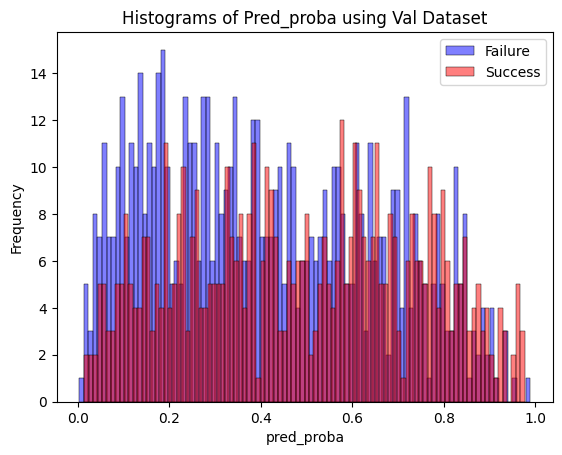


Failure Count: 703
Success Count: 551


In [ ]:
sns.histplot(data_val_results_0, x='pred_proba', bins=100, label='Failure', color='blue', alpha=0.5)
sns.histplot(data_val_results_1, x='pred_proba', bins=100, label='Success', color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Val Dataset')
plt.legend()
plt.show()

print()
print("Failure Count:", len(data_val_results_0))
print("Success Count:", len(data_val_results_1))

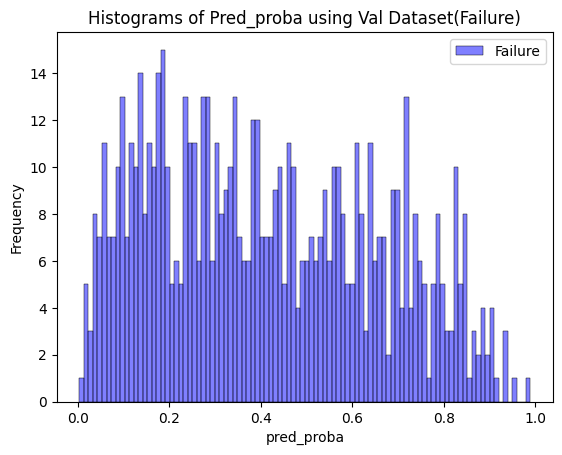

In [ ]:
sns.histplot(data_val_results_0, x='pred_proba', bins=100, label='Failure', color='blue', alpha=0.5)
plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Val Dataset(Failure)')
plt.legend()
plt.show()

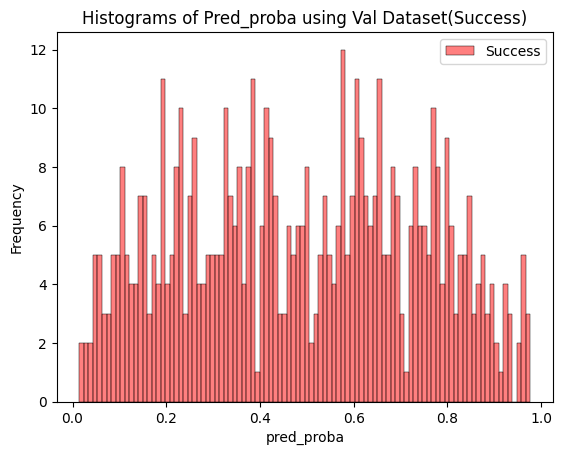

In [ ]:
sns.histplot(data_val_results_1, x='pred_proba', bins=100, label='Success', color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Val Dataset(Success)')
plt.legend()
plt.show()

### Analysis

#### 포지션 플레이: 자신에게 얼마나 쉽게 공을 주는가?  
**Threshold보다 큰 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 53
Success Count: 49

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 53
비율: 0.52


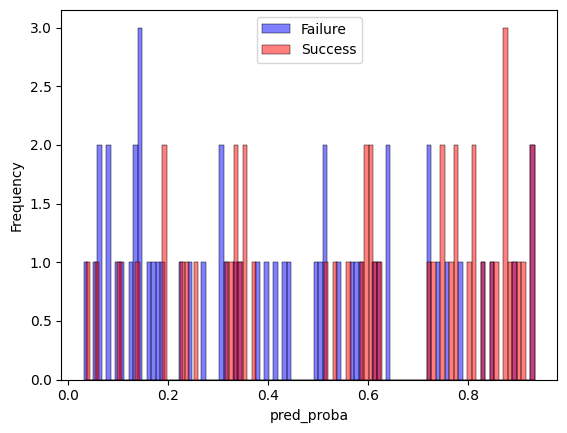

In [ ]:
김가영_포지션플레이_1 = data_val.loc[(data_val['Player'] == '김가영')&(data_val['Score'] == 1)]

김가영_포지션플레이_1_0 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 0]
김가영_포지션플레이_1_1 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_1_0))
print("Success Count:", len(김가영_포지션플레이_1_1))
print()



print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_1), 2))



sns.histplot(김가영_포지션플레이_1_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_1_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 14
Success Count: 12

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 16
비율: 0.62


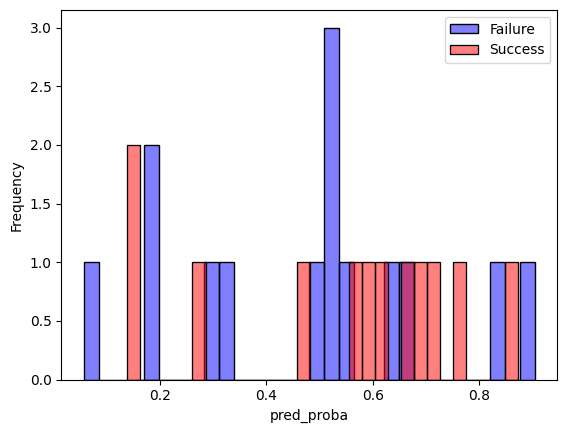

In [ ]:
스롱_포지션플레이_1 = data_val.loc[(data_val['Player'] == '스롱 피아비')&(data_val['Score'] == 1)]

스롱_포지션플레이_1_0 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 0]
스롱_포지션플레이_1_1 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_1_0))
print("Success Count:", len(스롱_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_1), 2))



sns.histplot(스롱_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 10
Success Count: 6

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 9
비율: 0.56


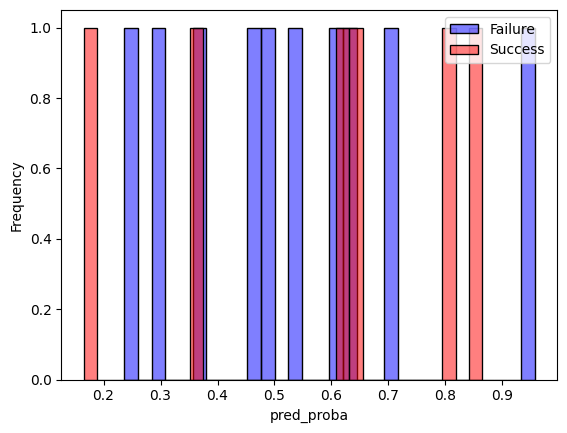

In [ ]:
백민주_포지션플레이_1 = data_val.loc[(data_val['Player'] == '백민주')&(data_val['Score'] == 1)]

백민주_포지션플레이_1_0 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 0]
백민주_포지션플레이_1_1 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_1_0))
print("Success Count:", len(백민주_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_1), 2))



sns.histplot(백민주_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 포지션 플레이: 상대방에게 얼마나 어렵게 공을 주는가?
**Threshold보다 작은 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 60
Success Count: 28

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 53
비율: 0.6


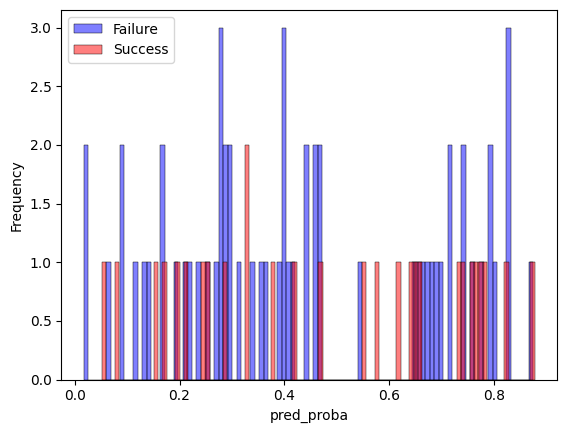

In [ ]:
김가영_포지션플레이_2 = data_val.loc[(data_val['Compet'] == '김가영')&(data_val['Score'] == 0)]

김가영_포지션플레이_2_0 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 0]
김가영_포지션플레이_2_1 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_2_0))
print("Success Count:", len(김가영_포지션플레이_2_1))
print()



print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_2), 2))



sns.histplot(김가영_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 26
Success Count: 13

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 26
비율: 0.67


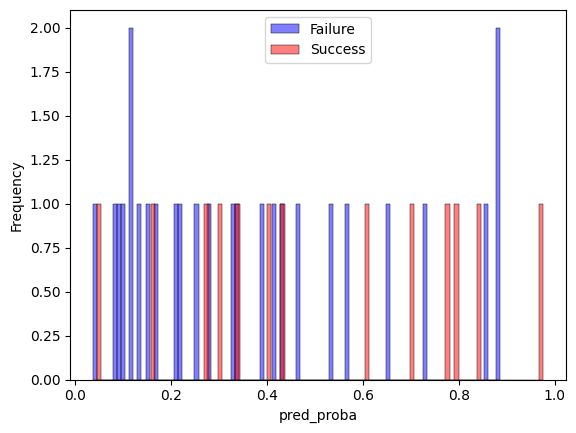

In [ ]:
스롱_포지션플레이_2 = data_val.loc[(data_val['Compet'] == '스롱 피아비')&(data_val['Score'] == 0)]

스롱_포지션플레이_2_0 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 0]
스롱_포지션플레이_2_1 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_2_0))
print("Success Count:", len(스롱_포지션플레이_2_1))
print()


print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_2), 2))


sns.histplot(스롱_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 15
Success Count: 8

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 15
비율: 0.65


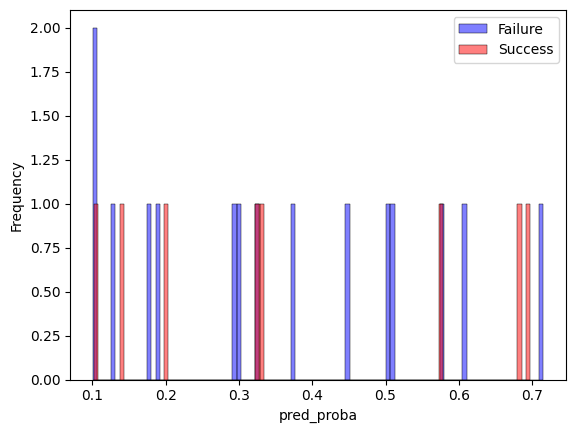

In [ ]:
백민주_포지션플레이_2 = data_val.loc[(data_val['Compet'] == '백민주')&(data_val['Score'] == 0)]

백민주_포지션플레이_2_0 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 0]
백민주_포지션플레이_2_1 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_2_0))
print("Success Count:", len(백민주_포지션플레이_2_1))
print()

print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_2), 2))

sns.histplot(백민주_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 저난이도 공을 얼마나 잘 처리하는가?
**Threshold 이상의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 38
Success Count: 54

저난이도 공 중 성공한 배치의 비율: 0.59


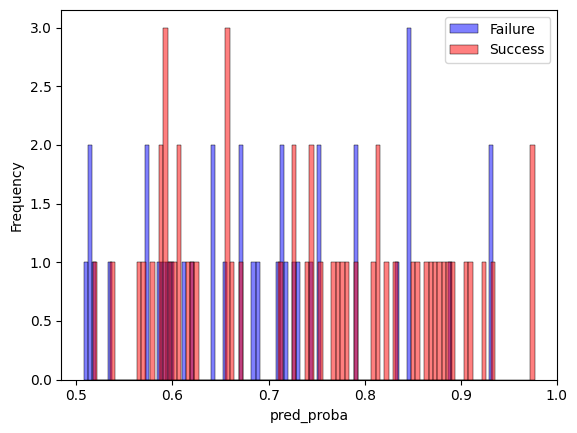

In [ ]:
김가영_해결력_1 = data_val.loc[(data_val['Player'] == '김가영')&(data_val['pred_proba'] > 0.5)]

김가영_해결력_1_0 = 김가영_해결력_1[김가영_해결력_1['Results'] == 0]
김가영_해결력_1_1 = 김가영_해결력_1[김가영_해결력_1['Results'] == 1]

print("Failure Count:", len(김가영_해결력_1_0))
print("Success Count:", len(김가영_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_1_1) / len(김가영_해결력_1), 2))



sns.histplot(김가영_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 19
Success Count: 19

저난이도 공 중 성공한 배치의 비율: 0.5


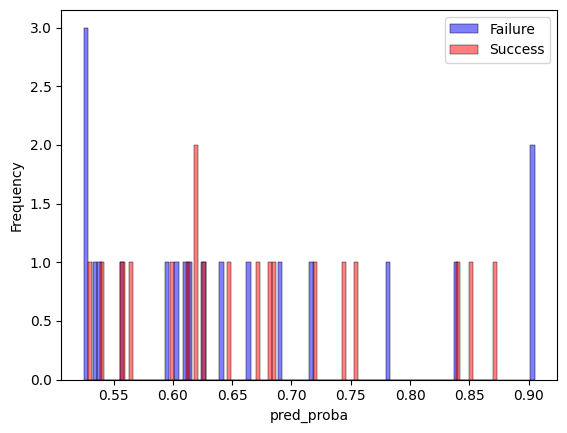

In [ ]:
스롱_해결력_1 = data_val.loc[(data_val['Player'] == '스롱 피아비')&(data_val['pred_proba'] > 0.5)]

스롱_해결력_1_0 = 스롱_해결력_1[스롱_해결력_1['Results'] == 0]
스롱_해결력_1_1 = 스롱_해결력_1[스롱_해결력_1['Results'] == 1]

print("Failure Count:", len(스롱_해결력_1_0))
print("Success Count:", len(스롱_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_1_1) / len(스롱_해결력_1), 2))


sns.histplot(스롱_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 11
Success Count: 8

저난이도 공 중 성공한 배치의 비율: 0.42


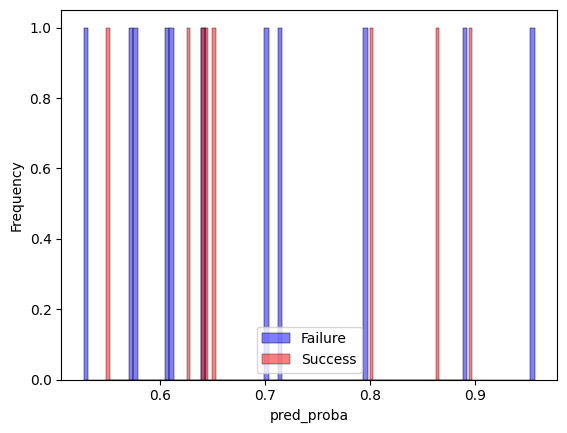

In [ ]:
백민주_해결력_1 = data_val.loc[(data_val['Player'] == '백민주')&(data_val['pred_proba'] > 0.5)]

백민주_해결력_1_0 = 백민주_해결력_1[백민주_해결력_1['Results'] == 0]
백민주_해결력_1_1 = 백민주_해결력_1[백민주_해결력_1['Results'] == 1]

print("Failure Count:", len(백민주_해결력_1_0))
print("Success Count:", len(백민주_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_1_1) / len(백민주_해결력_1), 2))


sns.histplot(백민주_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 고난이도 공을 얼마나 잘 처리하는가?
**Threshold 이하의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 63
Success Count: 44

고난이도 공 중 성공한 배치의 비율: 0.41


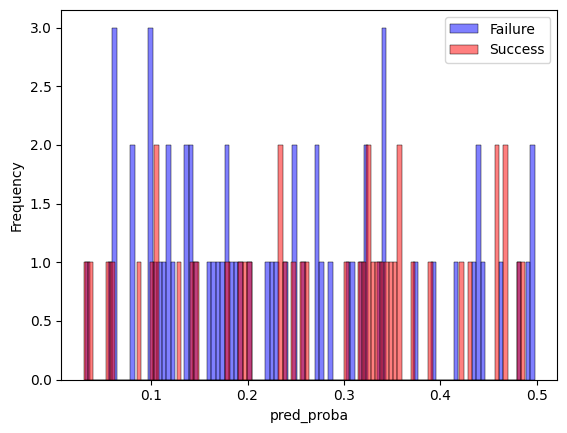

In [ ]:
김가영_해결력_2 = data_val.loc[(data_val['Player'] == '김가영')&(data_val['pred_proba'] < 0.5)]

김가영_해결력_2_0 = 김가영_해결력_2[김가영_해결력_2['Results'] == 0]
김가영_해결력_2_1 = 김가영_해결력_2[김가영_해결력_2['Results'] == 1]

print("Failure Count:", len(김가영_해결력_2_0))
print("Success Count:", len(김가영_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_2_1) / len(김가영_해결력_2), 2))



sns.histplot(김가영_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 25
Success Count: 18

고난이도 공 중 성공한 배치의 비율: 0.42


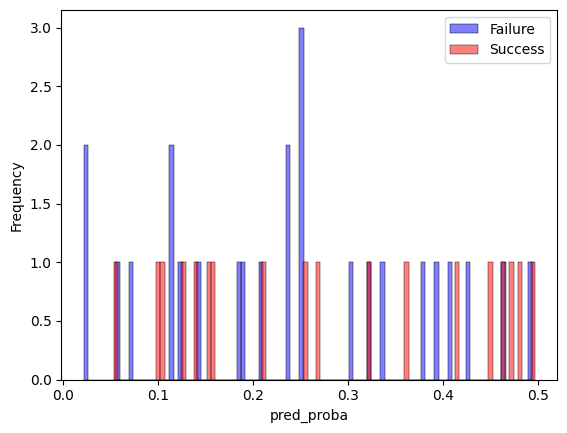

In [ ]:
스롱_해결력_2 = data_val.loc[(data_val['Player'] == '스롱 피아비')&(data_val['pred_proba'] < 0.5)]

스롱_해결력_2_0 = 스롱_해결력_2[스롱_해결력_2['Results'] == 0]
스롱_해결력_2_1 = 스롱_해결력_2[스롱_해결력_2['Results'] == 1]

print("Failure Count:", len(스롱_해결력_2_0))
print("Success Count:", len(스롱_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_2_1) / len(스롱_해결력_2), 2))


sns.histplot(스롱_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 15
Success Count: 8

고난이도 공 중 성공한 배치의 비율: 0.35


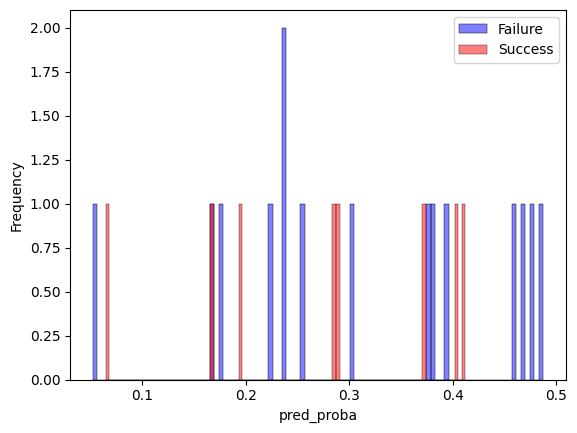

In [ ]:
백민주_해결력_2 = data_val.loc[(data_val['Player'] == '백민주')&(data_val['pred_proba'] < 0.5)]

백민주_해결력_2_0 = 백민주_해결력_2[백민주_해결력_2['Results'] == 0]
백민주_해결력_2_1 = 백민주_해결력_2[백민주_해결력_2['Results'] == 1]

print("Failure Count:", len(백민주_해결력_2_0))
print("Success Count:", len(백민주_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_2_1) / len(백민주_해결력_2), 2))


sns.histplot(백민주_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# V2

In [ ]:
train_v2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/LPBA_3/train_v2.csv')
val_v2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/LPBA_3/val_v2.csv')

data_1 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA/Data.xlsx')
data_2 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA_2/Data.xlsx')
data_3 = pd.read_excel('./drive/MyDrive/Colab Notebooks/LPBA_3/Data.xlsx')



data_1.drop('크라운해태 LPBA 챔피언십 2024 한가위', axis=1, inplace=True)
data_1.reset_index(inplace=True)
data_1.rename(columns={'index': 'image_name'}, inplace=True)
data_1['image_name'] = data_1['image_name'] + 1

data_2.drop('2024 LPBA SYBAZZAR Hanoi Open', axis=1, inplace=True)
data_2.reset_index(inplace=True)
data_2.rename(columns={'index': 'image_name'}, inplace=True)
data_2['image_name'] = data_2['image_name'] + 2164

data_3.drop('휴온스 LPBA 챔피언십', axis=1, inplace=True)
data_3.reset_index(inplace=True)
data_3.rename(columns={'index': 'image_name'}, inplace=True)
data_3['image_name'] = data_3['image_name'] + 4585

data = pd.concat([data_1,data_2,data_3], join='outer', axis=0, ignore_index=True)



train_v2.drop('Unnamed: 0', axis=1, inplace=True)
train_v2 = train_v2.sort_values(by='image_name', ascending=True).reset_index(drop=True)

val_v2.drop('Unnamed: 0', axis=1, inplace=True)
val_v2 = val_v2.sort_values(by='image_name', ascending=True).reset_index(drop=True)



data_train = data[data['image_name'].isin(train_v2['image_name'])]
data_train = pd.merge(data_train, train_v2, how='inner').reset_index(drop=True)

data_val = data[data['image_name'].isin(val_v2['image_name'])]
data_val = pd.merge(data_val, val_v2, how='inner').reset_index(drop=True)

## Train

In [ ]:
data_train

,image_name,Score,Ball,Results,Player,Compet,Match,Set,pred_proba
0,2164,초구,1,1,김가영,김세연,결승,5,0.401521
1,2165,1,1,1,김가영,김세연,결승,5,0.898347
2,2166,1,1,0,김가영,김세연,결승,5,0.160795
3,2167,0,1,1,김가영,김세연,결승,5,0.898499
4,2168,1,1,0,김가영,김세연,결승,5,0.131206
...,...,...,...,...,...,...,...,...,...
4170,6695,1,2,1,윤경남,김세연,32강,1,0.974811
4171,6696,1,2,0,윤경남,김세연,32강,1,0.062434
4172,6697,0,2,1,윤경남,김세연,32강,1,0.529524
4173,6698,1,2,0,윤경남,김세연,32강,1,0.387681


In [ ]:
data_train_results_0 = data_train[data_train['Results'] == 0]
data_train_results_1 = data_train[data_train['Results'] == 1]

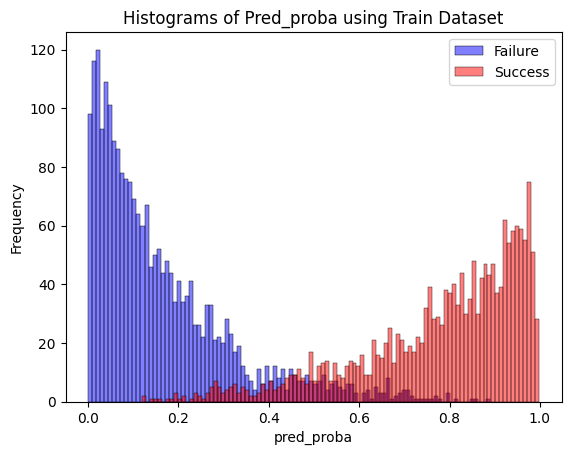


Failure Count: 2335
Success Count: 1840


In [ ]:
sns.histplot(data_train_results_0, x='pred_proba', bins=100, label='Failure', color='blue', alpha=0.5)
sns.histplot(data_train_results_1, x='pred_proba', bins=100, label='Success', color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Train Dataset')
plt.legend()
plt.show()

print()
print("Failure Count:", len(data_train_results_0))
print("Success Count:", len(data_train_results_1))

### Analysis

#### 포지션 플레이: 자신에게 얼마나 쉽게 공을 주는가?  
**Threshold보다 큰 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 123
Success Count: 155

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 151
비율: 0.54


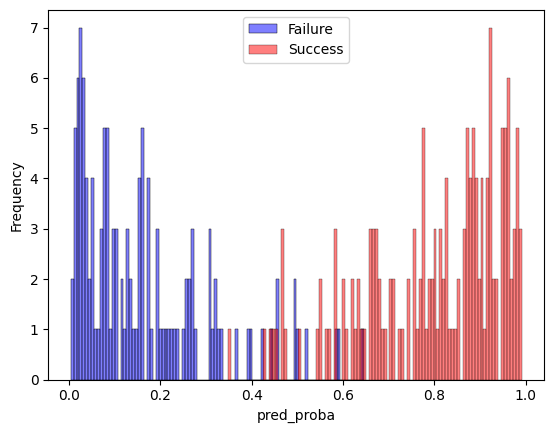

In [ ]:
김가영_포지션플레이_1 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['Score'] == 1)]

김가영_포지션플레이_1_0 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 0]
김가영_포지션플레이_1_1 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_1_0))
print("Success Count:", len(김가영_포지션플레이_1_1))
print()



print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_1), 2))



sns.histplot(김가영_포지션플레이_1_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_1_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 71
Success Count: 68

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 73
비율: 0.53


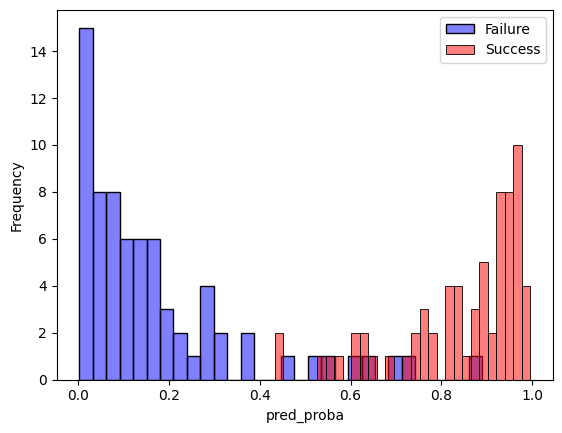

In [ ]:
스롱_포지션플레이_1 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['Score'] == 1)]

스롱_포지션플레이_1_0 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 0]
스롱_포지션플레이_1_1 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_1_0))
print("Success Count:", len(스롱_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_1), 2))



sns.histplot(스롱_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 40
Success Count: 28

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 30
비율: 0.44


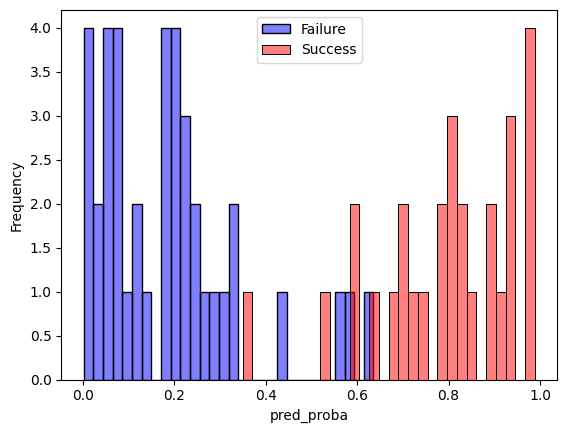

In [ ]:
백민주_포지션플레이_1 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['Score'] == 1)]

백민주_포지션플레이_1_0 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 0]
백민주_포지션플레이_1_1 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_1_0))
print("Success Count:", len(백민주_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_1), 2))



sns.histplot(백민주_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 포지션 플레이: 상대방에게 얼마나 어렵게 공을 주는가?
**Threshold보다 작은 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 159
Success Count: 95

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 156
비율: 0.61


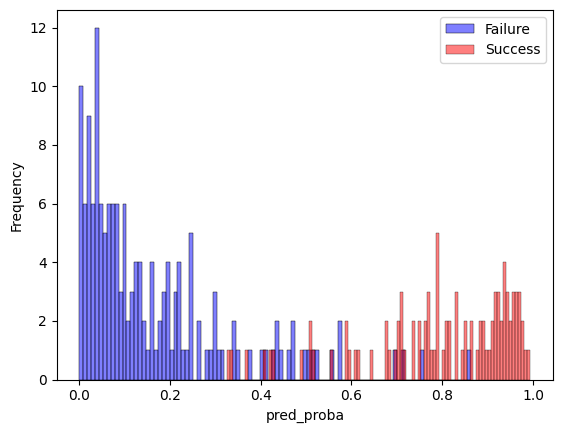

In [ ]:
김가영_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '김가영')&(data_train['Score'] == 0)]

김가영_포지션플레이_2_0 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 0]
김가영_포지션플레이_2_1 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_2_0))
print("Success Count:", len(김가영_포지션플레이_2_1))
print()



print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_2), 2))



sns.histplot(김가영_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 100
Success Count: 63

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 102
비율: 0.63


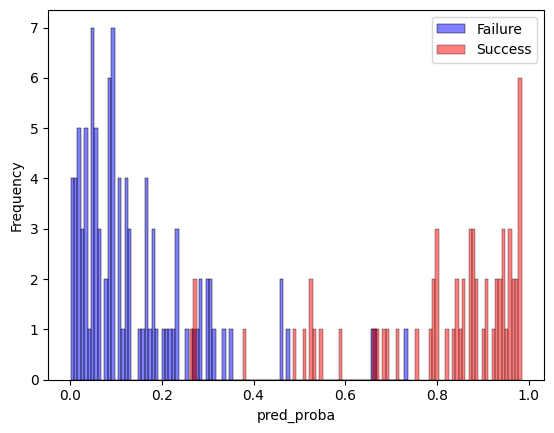

In [ ]:
스롱_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '스롱 피아비')&(data_train['Score'] == 0)]

스롱_포지션플레이_2_0 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 0]
스롱_포지션플레이_2_1 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_2_0))
print("Success Count:", len(스롱_포지션플레이_2_1))
print()


print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_2), 2))


sns.histplot(스롱_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 52
Success Count: 42

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 53
비율: 0.56


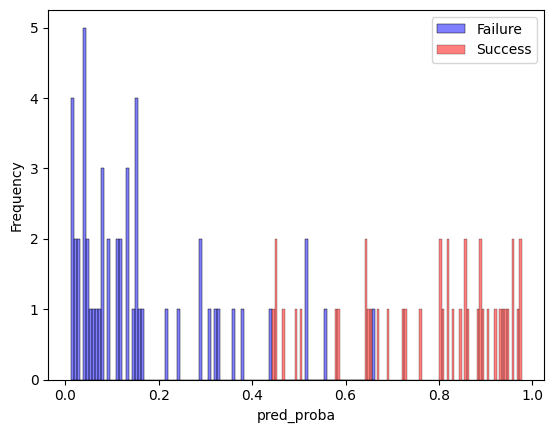

In [ ]:
백민주_포지션플레이_2 = data_train.loc[(data_train['Compet'] == '백민주')&(data_train['Score'] == 0)]

백민주_포지션플레이_2_0 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 0]
백민주_포지션플레이_2_1 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_2_0))
print("Success Count:", len(백민주_포지션플레이_2_1))
print()

print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_2), 2))

sns.histplot(백민주_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 저난이도 공을 얼마나 잘 처리하는가?
**Threshold 이상의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 9
Success Count: 284

저난이도 공 중 성공한 배치의 비율: 0.97


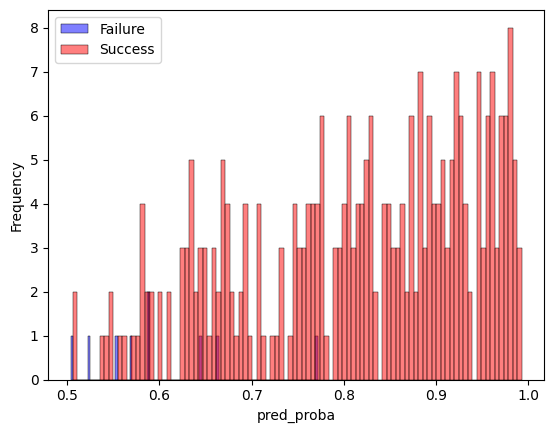

In [ ]:
김가영_해결력_1 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['pred_proba'] > 0.5)]

김가영_해결력_1_0 = 김가영_해결력_1[김가영_해결력_1['Results'] == 0]
김가영_해결력_1_1 = 김가영_해결력_1[김가영_해결력_1['Results'] == 1]

print("Failure Count:", len(김가영_해결력_1_0))
print("Success Count:", len(김가영_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_1_1) / len(김가영_해결력_1), 2))



sns.histplot(김가영_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 13
Success Count: 146

저난이도 공 중 성공한 배치의 비율: 0.92


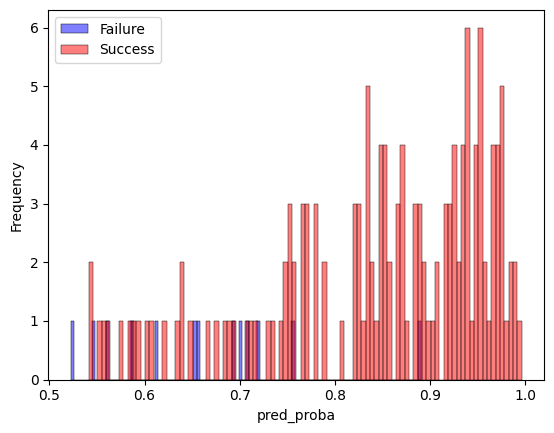

In [ ]:
스롱_해결력_1 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['pred_proba'] > 0.5)]

스롱_해결력_1_0 = 스롱_해결력_1[스롱_해결력_1['Results'] == 0]
스롱_해결력_1_1 = 스롱_해결력_1[스롱_해결력_1['Results'] == 1]

print("Failure Count:", len(스롱_해결력_1_0))
print("Success Count:", len(스롱_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_1_1) / len(스롱_해결력_1), 2))


sns.histplot(스롱_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 4
Success Count: 65

저난이도 공 중 성공한 배치의 비율: 0.94


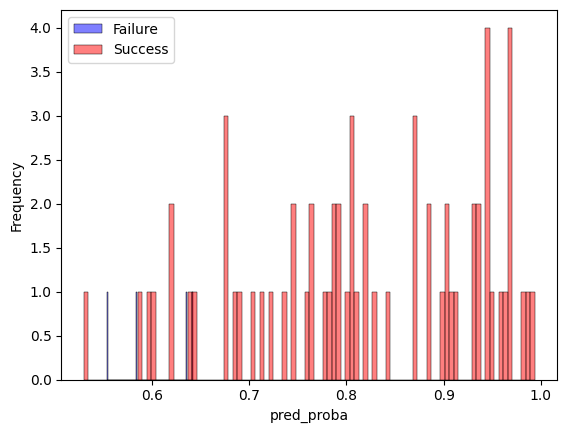

In [ ]:
백민주_해결력_1 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['pred_proba'] > 0.5)]

백민주_해결력_1_0 = 백민주_해결력_1[백민주_해결력_1['Results'] == 0]
백민주_해결력_1_1 = 백민주_해결력_1[백민주_해결력_1['Results'] == 1]

print("Failure Count:", len(백민주_해결력_1_0))
print("Success Count:", len(백민주_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_1_1) / len(백민주_해결력_1), 2))


sns.histplot(백민주_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 고난이도 공을 얼마나 잘 처리하는가?
**Threshold 이하의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 242
Success Count: 31

고난이도 공 중 성공한 배치의 비율: 0.11


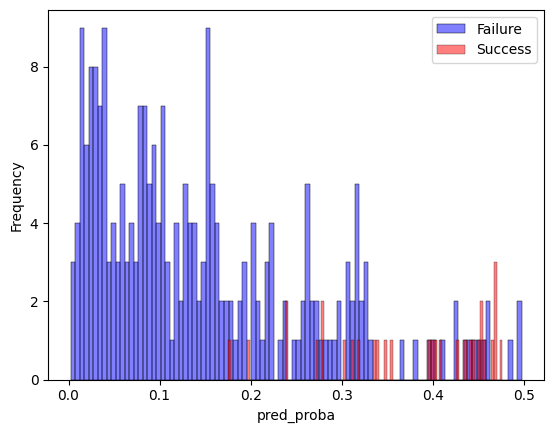

In [ ]:
김가영_해결력_2 = data_train.loc[(data_train['Player'] == '김가영')&(data_train['pred_proba'] < 0.5)]

김가영_해결력_2_0 = 김가영_해결력_2[김가영_해결력_2['Results'] == 0]
김가영_해결력_2_1 = 김가영_해결력_2[김가영_해결력_2['Results'] == 1]

print("Failure Count:", len(김가영_해결력_2_0))
print("Success Count:", len(김가영_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_2_1) / len(김가영_해결력_2), 2))



sns.histplot(김가영_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 151
Success Count: 9

고난이도 공 중 성공한 배치의 비율: 0.06


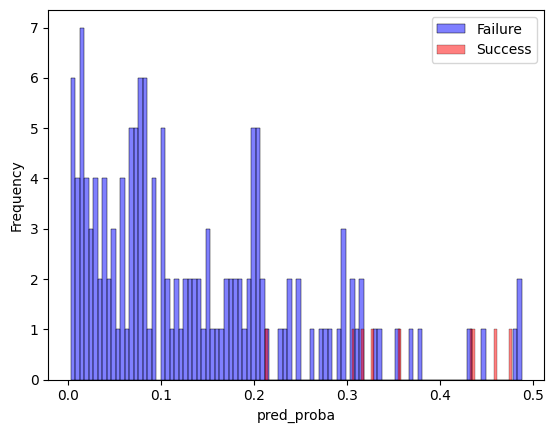

In [ ]:
스롱_해결력_2 = data_train.loc[(data_train['Player'] == '스롱 피아비')&(data_train['pred_proba'] < 0.5)]

스롱_해결력_2_0 = 스롱_해결력_2[스롱_해결력_2['Results'] == 0]
스롱_해결력_2_1 = 스롱_해결력_2[스롱_해결력_2['Results'] == 1]

print("Failure Count:", len(스롱_해결력_2_0))
print("Success Count:", len(스롱_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_2_1) / len(스롱_해결력_2), 2))


sns.histplot(스롱_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 88
Success Count: 7

고난이도 공 중 성공한 배치의 비율: 0.07


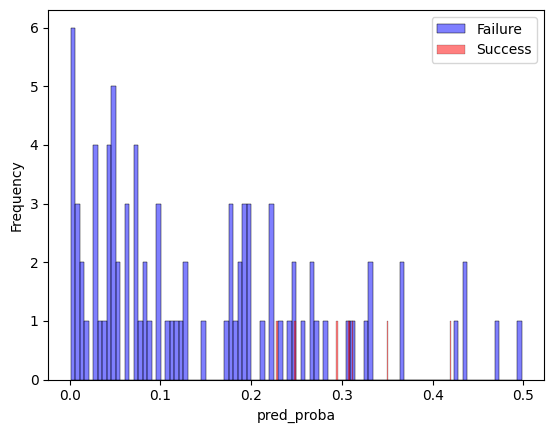

In [ ]:
백민주_해결력_2 = data_train.loc[(data_train['Player'] == '백민주')&(data_train['pred_proba'] < 0.5)]

백민주_해결력_2_0 = 백민주_해결력_2[백민주_해결력_2['Results'] == 0]
백민주_해결력_2_1 = 백민주_해결력_2[백민주_해결력_2['Results'] == 1]

print("Failure Count:", len(백민주_해결력_2_0))
print("Success Count:", len(백민주_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_2_1) / len(백민주_해결력_2), 2))


sns.histplot(백민주_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Test

In [ ]:
data_val

,image_name,Score,Ball,Results,Player,Compet,Match,Set,pred_proba
0,1,초구,1,0,김가영,한지은,결승,7,0.252936
1,2,0,1,0,김가영,한지은,결승,7,0.181048
2,3,0,1,0,김가영,한지은,결승,7,0.182938
3,4,0,1,0,김가영,한지은,결승,7,0.450314
4,5,0,1,1,김가영,한지은,결승,7,0.398768
...,...,...,...,...,...,...,...,...,...
2088,2159,1,2,1,강지은,이미래,32강,1,0.257338
2089,2160,1,2,0,강지은,이미래,32강,1,0.441231
2090,2161,0,2,1,강지은,이미래,32강,1,0.738652
2091,2162,1,2,0,강지은,이미래,32강,1,0.388493


In [ ]:
data_val_results_0 = data_val[data_val['Results'] == 0]
data_val_results_1 = data_val[data_val['Results'] == 1]

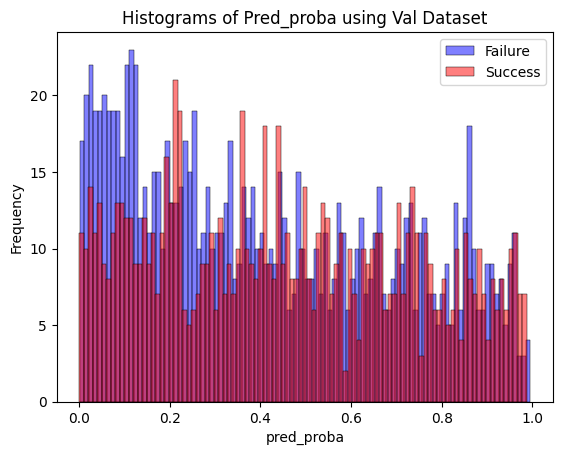


Failure Count: 1141
Success Count: 952


In [ ]:
sns.histplot(data_val_results_0, x='pred_proba', bins=100, label='Failure', color='blue', alpha=0.5)
sns.histplot(data_val_results_1, x='pred_proba', bins=100, label='Success', color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Val Dataset')
plt.legend()
plt.show()

print()
print("Failure Count:", len(data_val_results_0))
print("Success Count:", len(data_val_results_1))

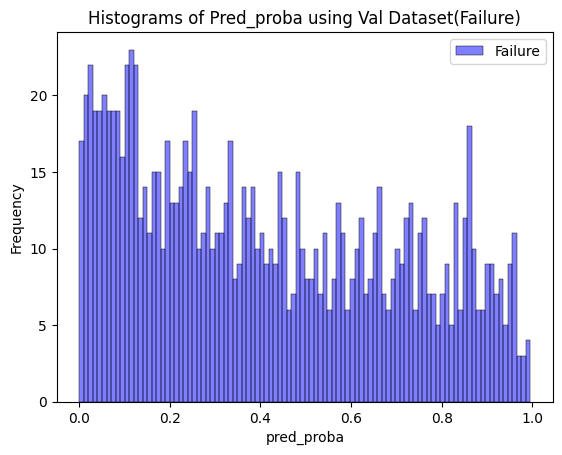

In [ ]:
sns.histplot(data_val_results_0, x='pred_proba', bins=100, label='Failure', color='blue', alpha=0.5)
plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Val Dataset(Failure)')
plt.legend()
plt.show()

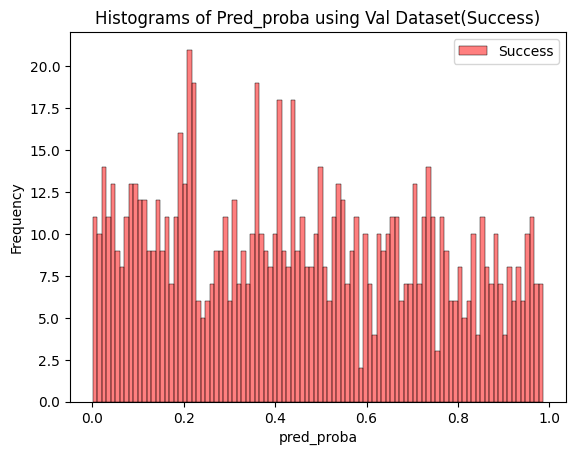

In [ ]:
sns.histplot(data_val_results_1, x='pred_proba', bins=100, label='Success', color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.title('Histograms of Pred_proba using Val Dataset(Success)')
plt.legend()
plt.show()

### Analysis

#### 포지션 플레이: 자신에게 얼마나 쉽게 공을 주는가?  
**Threshold보다 큰 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 73
Success Count: 77

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 74
비율: 0.49


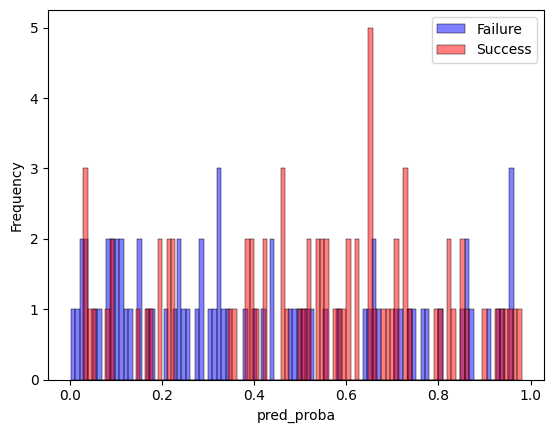

In [ ]:
김가영_포지션플레이_1 = data_val.loc[(data_val['Player'] == '김가영')&(data_val['Score'] == 1)]

김가영_포지션플레이_1_0 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 0]
김가영_포지션플레이_1_1 = 김가영_포지션플레이_1[김가영_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_1_0))
print("Success Count:", len(김가영_포지션플레이_1_1))
print()



print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(김가영_포지션플레이_1.loc[(김가영_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_1), 2))



sns.histplot(김가영_포지션플레이_1_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_1_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 11
Success Count: 13

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 10
비율: 0.42


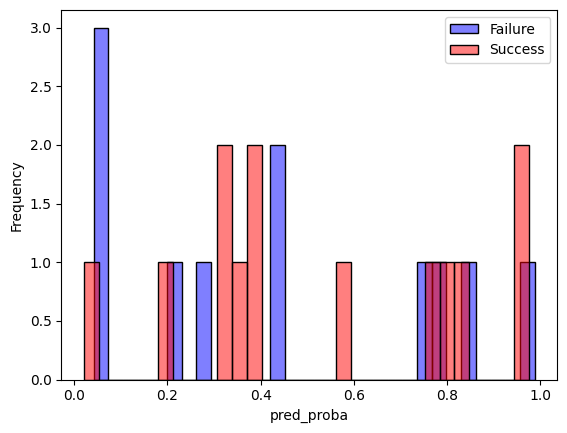

In [ ]:
스롱_포지션플레이_1 = data_val.loc[(data_val['Player'] == '스롱 피아비')&(data_val['Score'] == 1)]

스롱_포지션플레이_1_0 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 0]
스롱_포지션플레이_1_1 = 스롱_포지션플레이_1[스롱_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_1_0))
print("Success Count:", len(스롱_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(스롱_포지션플레이_1.loc[(스롱_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_1), 2))



sns.histplot(스롱_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 12
Success Count: 11

Threshold(0.5)보다 큰 확률값을 가진 배치의 수: 10
비율: 0.43


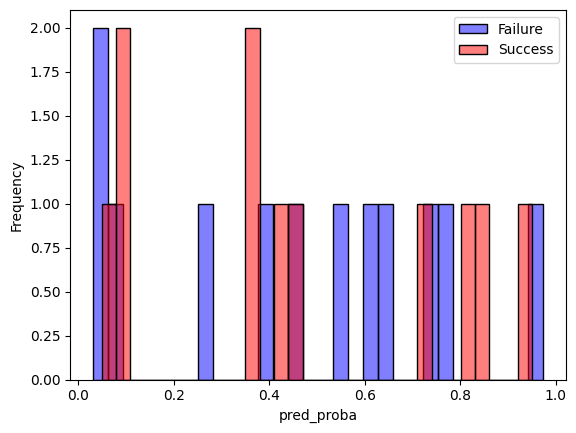

In [ ]:
백민주_포지션플레이_1 = data_val.loc[(data_val['Player'] == '백민주')&(data_val['Score'] == 1)]

백민주_포지션플레이_1_0 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 0]
백민주_포지션플레이_1_1 = 백민주_포지션플레이_1[백민주_포지션플레이_1['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_1_0))
print("Success Count:", len(백민주_포지션플레이_1_1))
print()

print("Threshold(0.5)보다 큰 확률값을 가진 배치의 수:", len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :]))
test = len(백민주_포지션플레이_1.loc[(백민주_포지션플레이_1['pred_proba'] > 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_1), 2))



sns.histplot(백민주_포지션플레이_1_0, x='pred_proba', bins=30, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_1_1, x='pred_proba', bins=30, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 포지션 플레이: 상대방에게 얼마나 어렵게 공을 주는가?
**Threshold보다 작은 확률 값을 가진 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 106
Success Count: 67

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 108
비율: 0.62


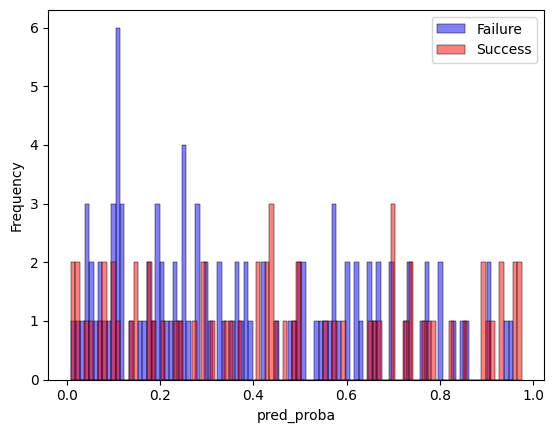

In [ ]:
김가영_포지션플레이_2 = data_val.loc[(data_val['Compet'] == '김가영')&(data_val['Score'] == 0)]

김가영_포지션플레이_2_0 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 0]
김가영_포지션플레이_2_1 = 김가영_포지션플레이_2[김가영_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(김가영_포지션플레이_2_0))
print("Success Count:", len(김가영_포지션플레이_2_1))
print()



print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(김가영_포지션플레이_2.loc[(김가영_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(김가영_포지션플레이_2), 2))



sns.histplot(김가영_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 20
Success Count: 13

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 23
비율: 0.7


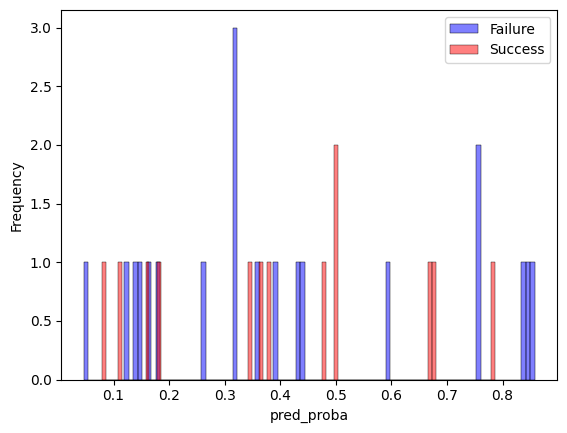

In [ ]:
스롱_포지션플레이_2 = data_val.loc[(data_val['Compet'] == '스롱 피아비')&(data_val['Score'] == 0)]

스롱_포지션플레이_2_0 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 0]
스롱_포지션플레이_2_1 = 스롱_포지션플레이_2[스롱_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(스롱_포지션플레이_2_0))
print("Success Count:", len(스롱_포지션플레이_2_1))
print()


print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(스롱_포지션플레이_2.loc[(스롱_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(스롱_포지션플레이_2), 2))


sns.histplot(스롱_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 24
Success Count: 24

Threshold(0.5)보다 작은 확률값을 가진 배치의 수: 25
비율: 0.52


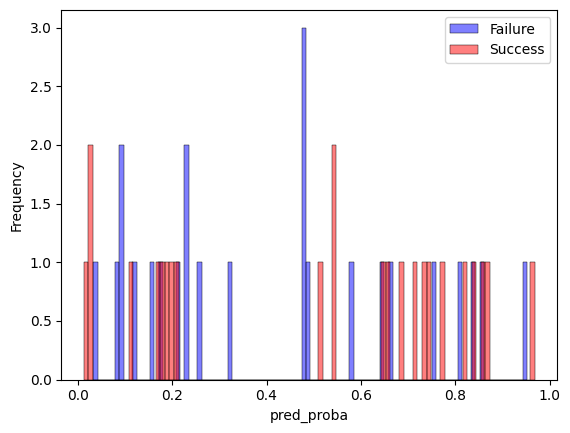

In [ ]:
백민주_포지션플레이_2 = data_val.loc[(data_val['Compet'] == '백민주')&(data_val['Score'] == 0)]

백민주_포지션플레이_2_0 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 0]
백민주_포지션플레이_2_1 = 백민주_포지션플레이_2[백민주_포지션플레이_2['Results'] == 1]

print("Failure Count:", len(백민주_포지션플레이_2_0))
print("Success Count:", len(백민주_포지션플레이_2_1))
print()

print("Threshold(0.5)보다 작은 확률값을 가진 배치의 수:", len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :]))
test = len(백민주_포지션플레이_2.loc[(백민주_포지션플레이_2['pred_proba'] < 0.5), :])
print("비율:", round(test / len(백민주_포지션플레이_2), 2))

sns.histplot(백민주_포지션플레이_2_0, x='pred_proba', bins=100, label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_포지션플레이_2_1, x='pred_proba', bins=100, label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 저난이도 공을 얼마나 잘 처리하는가?
**Threshold 이상의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 64
Success Count: 89

저난이도 공 중 성공한 배치의 비율: 0.58


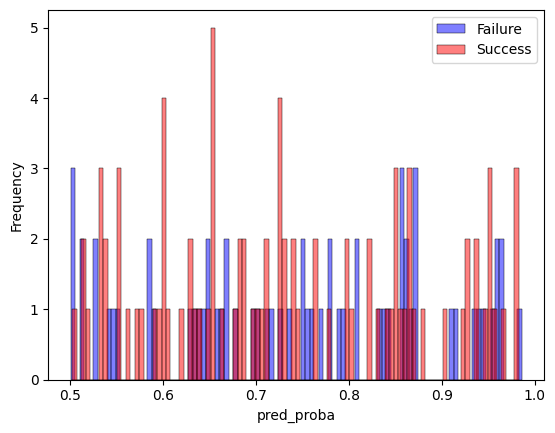

In [ ]:
김가영_해결력_1 = data_val.loc[(data_val['Player'] == '김가영')&(data_val['pred_proba'] > 0.5)]

김가영_해결력_1_0 = 김가영_해결력_1[김가영_해결력_1['Results'] == 0]
김가영_해결력_1_1 = 김가영_해결력_1[김가영_해결력_1['Results'] == 1]

print("Failure Count:", len(김가영_해결력_1_0))
print("Success Count:", len(김가영_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_1_1) / len(김가영_해결력_1), 2))



sns.histplot(김가영_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 10
Success Count: 9

저난이도 공 중 성공한 배치의 비율: 0.47


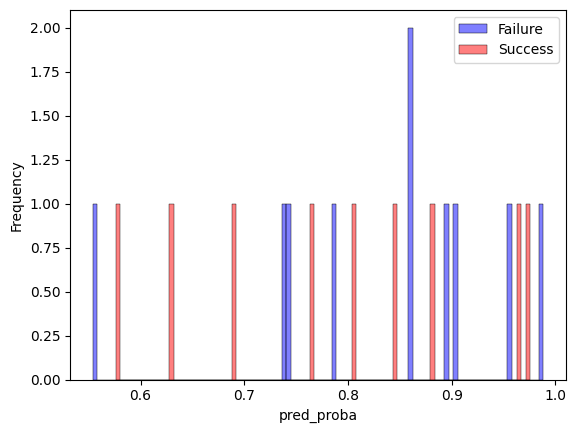

In [ ]:
스롱_해결력_1 = data_val.loc[(data_val['Player'] == '스롱 피아비')&(data_val['pred_proba'] > 0.5)]

스롱_해결력_1_0 = 스롱_해결력_1[스롱_해결력_1['Results'] == 0]
스롱_해결력_1_1 = 스롱_해결력_1[스롱_해결력_1['Results'] == 1]

print("Failure Count:", len(스롱_해결력_1_0))
print("Success Count:", len(스롱_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_1_1) / len(스롱_해결력_1), 2))


sns.histplot(스롱_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 16
Success Count: 8

저난이도 공 중 성공한 배치의 비율: 0.33


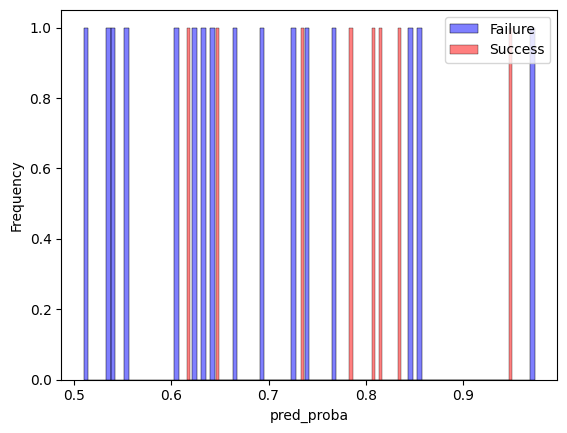

In [ ]:
백민주_해결력_1 = data_val.loc[(data_val['Player'] == '백민주')&(data_val['pred_proba'] > 0.5)]

백민주_해결력_1_0 = 백민주_해결력_1[백민주_해결력_1['Results'] == 0]
백민주_해결력_1_1 = 백민주_해결력_1[백민주_해결력_1['Results'] == 1]

print("Failure Count:", len(백민주_해결력_1_0))
print("Success Count:", len(백민주_해결력_1_1))
print()

print("저난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_1_1) / len(백민주_해결력_1), 2))


sns.histplot(백민주_해결력_1_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_1_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 해결력: 고난이도 공을 얼마나 잘 처리하는가?
**Threshold 이하의 배치 중 성공한 배치가 많을수록 좋다.**

##### 김가영

Failure Count: 105
Success Count: 79

고난이도 공 중 성공한 배치의 비율: 0.43


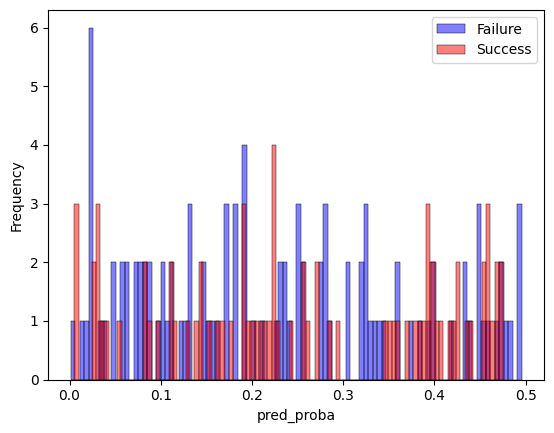

In [ ]:
김가영_해결력_2 = data_val.loc[(data_val['Player'] == '김가영')&(data_val['pred_proba'] < 0.5)]

김가영_해결력_2_0 = 김가영_해결력_2[김가영_해결력_2['Results'] == 0]
김가영_해결력_2_1 = 김가영_해결력_2[김가영_해결력_2['Results'] == 1]

print("Failure Count:", len(김가영_해결력_2_0))
print("Success Count:", len(김가영_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(김가영_해결력_2_1) / len(김가영_해결력_2), 2))



sns.histplot(김가영_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(김가영_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 스롱 피아비

Failure Count: 19
Success Count: 14

고난이도 공 중 성공한 배치의 비율: 0.42


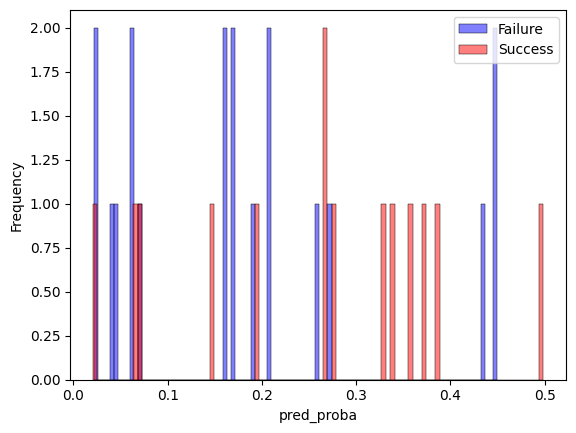

In [ ]:
스롱_해결력_2 = data_val.loc[(data_val['Player'] == '스롱 피아비')&(data_val['pred_proba'] < 0.5)]

스롱_해결력_2_0 = 스롱_해결력_2[스롱_해결력_2['Results'] == 0]
스롱_해결력_2_1 = 스롱_해결력_2[스롱_해결력_2['Results'] == 1]

print("Failure Count:", len(스롱_해결력_2_0))
print("Success Count:", len(스롱_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(스롱_해결력_2_1) / len(스롱_해결력_2), 2))


sns.histplot(스롱_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(스롱_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 백민주

Failure Count: 19
Success Count: 15

고난이도 공 중 성공한 배치의 비율: 0.44


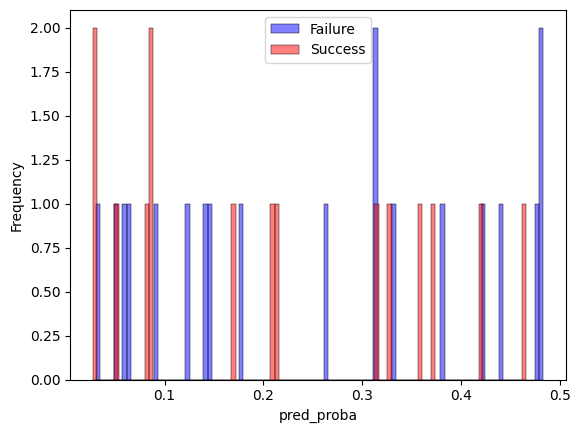

In [ ]:
백민주_해결력_2 = data_val.loc[(data_val['Player'] == '백민주')&(data_val['pred_proba'] < 0.5)]

백민주_해결력_2_0 = 백민주_해결력_2[백민주_해결력_2['Results'] == 0]
백민주_해결력_2_1 = 백민주_해결력_2[백민주_해결력_2['Results'] == 1]

print("Failure Count:", len(백민주_해결력_2_0))
print("Success Count:", len(백민주_해결력_2_1))
print()

print("고난이도 공 중 성공한 배치의 비율:", round(len(백민주_해결력_2_1) / len(백민주_해결력_2), 2))


sns.histplot(백민주_해결력_2_0, x='pred_proba', bins=100 ,label = 'Failure' ,color='blue', alpha=0.5)
sns.histplot(백민주_해결력_2_1, x='pred_proba', bins=100 ,label = 'Success' ,color='red', alpha=0.5)

plt.xlabel('pred_proba')
plt.ylabel('Frequency')
plt.legend()
plt.show()